v initial


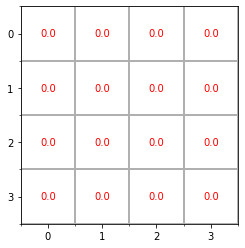

delta: 1.0 iteration: 0


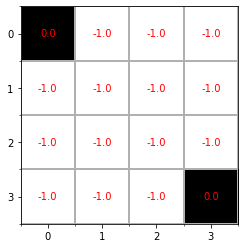

delta: 1.0 iteration: 1


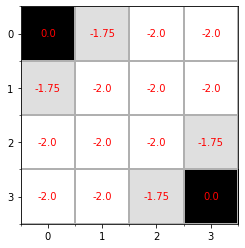

delta: 1.0 iteration: 2


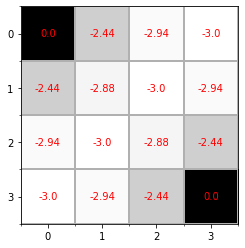

delta: 0.6925201416015625 iteration: 10


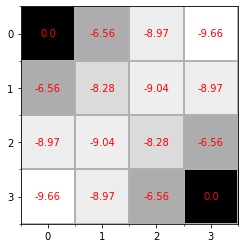

delta: 0.000982206667735852 iteration: 130


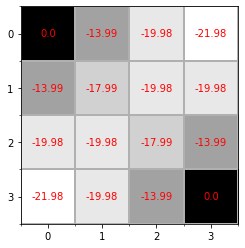

In [8]:
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

def afficher_grille(grille):
    """ Afficher les cases de la grille.
    grille : tableau 2d de cases qui correspondent aux états du monde
    """
    largeur, hauteur = grille.shape
    plt.figure(figsize=(largeur, hauteur))
    im = plt.imshow(grille,interpolation='none',cmap = mpl.cm.binary)
    ax = plt.gca()
    # Graduation majeure pour les axes
    ax.set_xticks(np.arange(0, largeur, 1))
    ax.set_yticks(np.arange(0, hauteur, 1))
    # Etiquettes de graduation
    ax.set_xticklabels(np.arange(0, largeur, 1));
    ax.set_yticklabels(np.arange(0, hauteur, 1));
    # Graduations mineures
    ax.set_xticks(np.arange(-.5, largeur, 1), minor=True);
    ax.set_yticks(np.arange(-.5, hauteur, 1), minor=True);

    # Quadrillage pour délimiter les pixels
    ax.grid(which='minor', linestyle='-', linewidth=2)

    for i in range(largeur):
        for j in range(hauteur):
            text = ax.text(j, i,round(grille[i, j],2),ha="center", va="center", color="r")
            
    plt.show()

gamma = 1 # taux d'escompte
taille_grille = 4
recompense = -1
etats_terminaux = [[0,0], [taille_grille-1, taille_grille-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
nombre_iterations = 1000

def p(s,a):
    """ Retourne l'état suivant s_prime et la récompense r"""
    if s in etats_terminaux:
        return s, 0
    s_prime = np.array(s) + np.array(a)
    r = recompense
    # si débordement de grille retour à l'état s
    if -1 in s_prime or taille_grille in s_prime:
        s_prime = s
    return s_prime, r

etats = [[i, j] for i in range(taille_grille) for j in range(taille_grille)]

def calculer_v_par_iteration(etats,actions,nombre_iterations,gamma):
    """ Calcul de la récompense moyenne anticipée pour la politique aléatoire
    par itération de l'équation de Bellman pour v """
    v = np.zeros((taille_grille, taille_grille)) 
    print("v initial")
    afficher_grille(v)
    
    for i in range(nombre_iterations):
        copie_v=np.copy(v)
        delta = 0
        for etat in etats :
            v_nouveau=0
            for action in actions:
                s_prime,r = p(etat,action)
                v_nouveau += 1/len(actions)* (r + gamma * copie_v[s_prime[0],s_prime[1]])
            v[etat[0],etat[1]]=v_nouveau
            delta =max(delta,abs(v_nouveau-copie_v[etat[0],etat[1]]))
        
        if i in [0,1,2,10]:
            print("delta:", delta, "iteration:",i)
            afficher_grille(v)
        if(delta < 0.001):
            print("delta:", delta, "iteration:",i)
            afficher_grille(v)
            break
            
calculer_v_par_iteration(etats,actions,1000,1)
